In [77]:
import numpy as np
import pandas as pd
from sklearn import model_selection, mixture, metrics
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.core.interactiveshell import InteractiveShell


In [2]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [5]:
data = pd.read_csv('heightWeight.csv')
# 0为女 1为男
data.head()
data.shape

,Sex,Height(cm),Weight(kg)
0,0,156.0,50.0
1,0,160.0,60.0
2,0,162.0,54.0
3,0,162.0,55.0
4,0,160.5,56.0


(114, 3)

In [6]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]

In [11]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=66)
gmm.fit(x_train)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=66, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
gmm.means_
gmm.covariances_
gmm.weights_

array([[171.96442353,  66.84427353],
       [159.71559464,  55.54456179]])

array([[[30.14860877, 16.86814659],
        [16.86814659, 83.9314014 ]],

       [[18.95244247, 13.82918032],
        [13.82918032, 33.95170792]]])

array([0.40661911, 0.59338089])

In [15]:
# Component labels 高斯的组成成分的索引
y_train_pred = gmm.predict(x_train)
y_test_pred = gmm.predict(x_test)


In [14]:
y_train_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [16]:
# 取出第一个高斯(男生分身高布)的身高的均值 取出第二个高斯(女生身高的正态分布)函数身高的均值
change = (gmm.means_[0][0] > gmm.means_[1][0])
if change:
    # 男的平均身高大于女的平均身高 组成成分0位男的高斯分布
    z = (y_train_pred == 0)
    # 标签预测为1(男)
    y_train_pred[z] = 1
    y_train_pred[~z] = 0
    
    z = (y_test_pred == 0)
    y_test_pred[z] = 1
    y_test_pred[~z] = 0
    

In [74]:
# 评估模型
acc_train = np.mean(y_train_pred.ravel() == y_train)
acc_test = np.mean(y_test_pred.ravel() == y_test)
acc_train_str = '训练集正确率' + str(np.round(acc_train, 4))
acc_test_str = '测试集准确率' + str(np.round(acc_test, 4))


print('训练集正确率', np.mean(y_train_pred == y_train))
print('测试集正确率', np.mean(y_test_pred == y_test))
print('\n')
print('训练集正确率', metrics.accuracy_score(y_train, y_train_pred))
print('测试集正确率', metrics.accuracy_score(y_test, y_test_pred))

训练集正确率 0.8481012658227848
测试集正确率 0.7142857142857143


训练集正确率 0.8481012658227848
测试集正确率 0.7142857142857143


In [36]:
def expand(a, b):
    d = (b - a) * 0.05
    return a-d, b+d

<Figure size 648x504 with 0 Axes>

<a list of 3 text.Text objects>

Text(147.0, 90.4844273912796, '训练集正确率0.8481')

Text(147.0, 87.72664108691937, '测试集准确率0.7143')

(147.0, 187.0)

(45.0, 95.0)

Text(0.5, 0, '身高(cm)')

Text(0, 0.5, '体重(kg)')

Text(0.5, 1.0, 'EM算法估算GMM的参数')

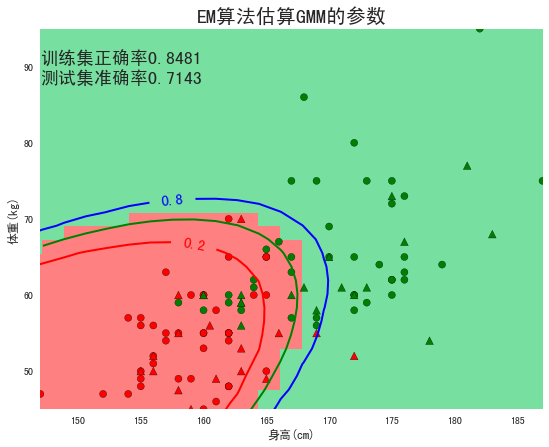

In [75]:
cm_light = colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = colors.ListedColormap(['r', 'g'])
# 身高的最小值 最大值
x1_min, x1_max = np.min(x_train.iloc[:, 0], axis=0), np.max(x_train.iloc[:, 0], axis=0)
# 体重的最小值,最大值
x2_min, x2_max = np.min(x_train.iloc[:, 1], axis=0), np.max(x_train.iloc[:, 1], axis=0)

# x1_min, x1_max = expand(x1_min, x1_max)
# x2_min, x2_max = expand(x2_min, x2_max)
    
# 将上面的点形成30 * 30 个网格点 将两个一维向量转换为特征矩阵
axis_x = np.linspace(x1_min - 5, x1_max + 5, num=30)
axis_y = np.linspace(x2_min - 1, x2_max + 1, num=30)
axis_x, axis_y = np.meshgrid(axis_x, axis_y)
# ravel 拉平降维 在转置把数据变成900个点
grid_data = np.stack([axis_x.ravel(), axis_y.ravel()], axis=1)
# grid_data = np.stack((axis_x.flat, axis_y.flat), axis=1)

# 
grid_hat = gmm.predict(grid_data).reshape(axis_x.shape)
if change:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
plt.figure(figsize=(9, 7))
plt.pcolormesh(axis_x, axis_y, grid_hat, cmap=cm_light)
# 绘制训练集和测试集的散点图
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], s=50, c=y_train, marker='o', cmap=cm_dark, edgecolors='k')
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], s=60, c=y_test, marker='^', cmap=cm_dark, edgecolors='k')

prob = gmm.predict_proba(grid_data)
# 取出身高来自哪个组分的高斯
prob = prob[:, 0].reshape(axis_x.shape)
# prob 当做等高线的距离
cs = plt.contour(axis_x, axis_y, prob, 
                 levels=[0.2, 0.5, 0.8], 
                 colors=list('rgb'), 
#                  linestyles=['--', '-', '--'],
                 linewidths=2)
# inline 数字显示样式不一样 
plt.clabel(cs, fontsize=15, fmt='%.1f', inline=True)

ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
xx = 0.9*ax1_min + 0.1*ax1_max
yy = 0.1*ax2_min + 0.9*ax2_max
# plt.annotate
plt.text(xx, yy, acc_train_str, fontsize=18)
yy = 0.15*ax2_min + 0.85*ax2_max

plt.text(xx, yy, acc_test_str, fontsize=18)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.xlabel(u'身高(cm)', fontsize='large')
plt.ylabel(u'体重(kg)', fontsize='large')
plt.title(u'EM算法估算GMM的参数', fontsize=20)
plt.grid()
plt.show()

In [42]:
xy

array([[146.995     , 148.37465517, 149.75431034, ..., 184.24568966,
        185.62534483, 187.005     ],
       [ 44.995     ,  44.995     ,  44.995     , ...,  95.005     ,
         95.005     ,  95.005     ]])

<a list of 3 text.Text objects>

Text(149.39600000000002, 92.00399999999999, '0.8481012658227848')

Text(149.39600000000002, 89.2535, '0.8481012658227848')

(145.0, 189.0)

(42.5, 97.5)

Text(0.5, 0, '身高(cm)')

Text(0, 0.5, '体重(kg)')

Text(0.5, 1.0, 'EM算法估算GMM的参数')

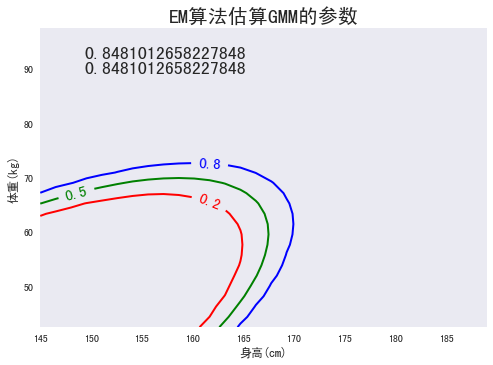

(0.0, 1.0, 0.0, 1.0)

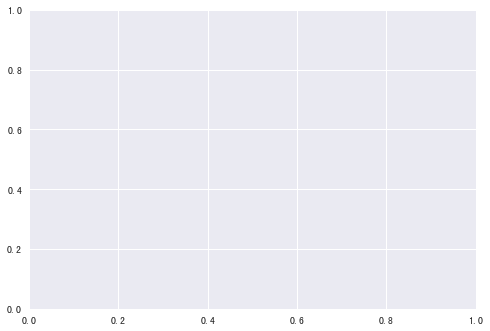

In [56]:
plt.axis()